# Обработка данных

## Научно-исследовательская и аналитическая работа - 20 \% анализ данных с помощью разнообразных моделей, 80 \% - сбор и обработка данных.

## Этапы работы:

1. Сбор данных (скрейпинг и парсинг ИЛИ вручную) 
2. <ins>**Обработка данных и объединение данных (в единый массив, который будет использоваться в анализе)**</ins>
3. Анализ полученного массива с использованием статистических методов (или методов машинного обучения)
4. Интерпретация результатов, обсуждение

## Объединение данных
Библиотека pandas позволяет объединять массивы данных разной размерности и структуры в пригодные для анализа. На данном занятии мы увидим, как это работает. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy

In [4]:
#загрузим два простых массива
dataset1 = pd.read_csv("sforce.csv")
dataset2 = pd.read_csv("dollars.csv")

In [8]:
dataset1

,region,name
0,N Cntrl,Krantz
1,N Cntrl,Phipps
2,N Cntrl,Willis
3,NE,Ecklund
4,NE,Franks
5,South,Anderson
6,South,Dubnoff
7,South,Lee
8,South,McNeil
9,West,Charles


In [9]:
dataset2

,region,sales,cost
0,N Cntrl,419472,227677
1,NE,360523,138097
2,South,532399,330499
3,West,310565,165348


## Предположим, что нам нужно объединить данные массивы в один - что будет идентификатором для объединения? 

In [10]:
#функция merge библиотеки pandas позволяет объединять массивы
merged_data = pd.merge(dataset1, dataset2, on = ["region"])
merged_data
#мы получили массив с продажами и издержками по регионам

,region,name,sales,cost
0,N Cntrl,Krantz,419472,227677
1,N Cntrl,Phipps,419472,227677
2,N Cntrl,Willis,419472,227677
3,NE,Ecklund,360523,138097
4,NE,Franks,360523,138097
5,South,Anderson,532399,330499
6,South,Dubnoff,532399,330499
7,South,Lee,532399,330499
8,South,McNeil,532399,330499
9,West,Charles,310565,165348


In [12]:
#повторение пройденного - создание новых переменных 
merged_data["sales_low"] = [x<=400000 for x in merged_data["sales"]]
merged_data

,region,name,sales,cost,sales_low
0,N Cntrl,Krantz,419472,227677,False
1,N Cntrl,Phipps,419472,227677,False
2,N Cntrl,Willis,419472,227677,False
3,NE,Ecklund,360523,138097,True
4,NE,Franks,360523,138097,True
5,South,Anderson,532399,330499,False
6,South,Dubnoff,532399,330499,False
7,South,Lee,532399,330499,False
8,South,McNeil,532399,330499,False
9,West,Charles,310565,165348,True


In [13]:
#можно использовать несколько условий одновременно! 
merged_data["sales_cost"] = [x<=400000 and y <=150000 for x,y in zip(merged_data["sales"], merged_data["cost"])]
merged_data

,region,name,sales,cost,sales_low,sales_cost
0,N Cntrl,Krantz,419472,227677,False,False
1,N Cntrl,Phipps,419472,227677,False,False
2,N Cntrl,Willis,419472,227677,False,False
3,NE,Ecklund,360523,138097,True,True
4,NE,Franks,360523,138097,True,True
5,South,Anderson,532399,330499,False,False
6,South,Dubnoff,532399,330499,False,False
7,South,Lee,532399,330499,False,False
8,South,McNeil,532399,330499,False,False
9,West,Charles,310565,165348,True,False


In [14]:
#идентичный результат, но с немного другим кодом
merged_data["sales_cost"] = [merged_data["sales"][x]<=400000 and merged_data["cost"][x] <=150000 for x in range(len(merged_data))]
merged_data

,region,name,sales,cost,sales_low,sales_cost
0,N Cntrl,Krantz,419472,227677,False,False
1,N Cntrl,Phipps,419472,227677,False,False
2,N Cntrl,Willis,419472,227677,False,False
3,NE,Ecklund,360523,138097,True,True
4,NE,Franks,360523,138097,True,True
5,South,Anderson,532399,330499,False,False
6,South,Dubnoff,532399,330499,False,False
7,South,Lee,532399,330499,False,False
8,South,McNeil,532399,330499,False,False
9,West,Charles,310565,165348,True,False


In [15]:
#мы можем проводить с переменными в массивах поэлементные операции
merged_data["sales_minus_cost"] = merged_data["sales"] - merged_data["cost"]
merged_data

,region,name,sales,cost,sales_low,sales_cost,sales_minus_cost
0,N Cntrl,Krantz,419472,227677,False,False,191795
1,N Cntrl,Phipps,419472,227677,False,False,191795
2,N Cntrl,Willis,419472,227677,False,False,191795
3,NE,Ecklund,360523,138097,True,True,222426
4,NE,Franks,360523,138097,True,True,222426
5,South,Anderson,532399,330499,False,False,201900
6,South,Dubnoff,532399,330499,False,False,201900
7,South,Lee,532399,330499,False,False,201900
8,South,McNeil,532399,330499,False,False,201900
9,West,Charles,310565,165348,True,False,145217


In [16]:
merged_data["sales_divide_cost"] = merged_data["sales"]/merged_data["cost"]
merged_data

,region,name,sales,cost,sales_low,sales_cost,sales_minus_cost,sales_divide_cost
0,N Cntrl,Krantz,419472,227677,False,False,191795,1.842400
1,N Cntrl,Phipps,419472,227677,False,False,191795,1.842400
2,N Cntrl,Willis,419472,227677,False,False,191795,1.842400
3,NE,Ecklund,360523,138097,True,True,222426,2.610650
4,NE,Franks,360523,138097,True,True,222426,2.610650
5,South,Anderson,532399,330499,False,False,201900,1.610894
6,South,Dubnoff,532399,330499,False,False,201900,1.610894
7,South,Lee,532399,330499,False,False,201900,1.610894
8,South,McNeil,532399,330499,False,False,201900,1.610894
9,West,Charles,310565,165348,True,False,145217,1.878251


In [71]:
#давайте посмотрим, как работает операция решейпинга 
#создадим массив в широком формате, предполагая, что строки определены странами
#столбцы, за исключением первого, кодируют года и индикаторы (инфляция и ВВП),
#в ячейках же указан уровень инфляции (в процентах) и уровень ВВП на душу населения
df = pd.DataFrame({'Страна': {0: 'a', 1: 'b', 2: 'c'},
                   'Инфляция_2000': {0: 1, 1: 3, 2: 5},
                   'Инфляция_2001': {0: 2, 1: 4, 2: 6},
                   'ВВП_2000': {0: 15000, 1: 10000, 2: 3000},
                   'ВВП_2001': {0: 16000, 1: 10500, 2: 5000}})
df

,Страна,Инфляция_2000,Инфляция_2001,ВВП_2000,ВВП_2001
0,a,1,2,15000,16000
1,b,3,4,10000,10500
2,c,5,6,3000,5000


In [72]:
#сделаем решейпинг массива в длинный формат с помощью melt для инфляции
long_data = df.melt(id_vars = ['Страна'],
                    value_vars = ['Инфляция_2000', 'Инфляция_2001'],
                    var_name = 'Год',
                    value_name = 'Инфляция')
#отсортируем по странам и годам
long_data.sort_values(by = ['Страна', 'Год'])
#melt - универсальный метод решейпинга, но для данной задачи можно было воспользоваться и другим методом
long_data['Год'] = long_data['Год'].apply(lambda x: x[-4:])
long_data

,Страна,Год,Инфляция
0,a,2000,1
1,b,2000,3
2,c,2000,5
3,a,2001,2
4,b,2001,4
5,c,2001,6


In [73]:
#сделаем решейпинг массива в длинный формат с помощью melt для ВВП
long_data_gdp = df.melt(id_vars = ['Страна'],
                        value_vars = ['ВВП_2000', 'ВВП_2001'],
                        var_name = 'Год',
                        value_name = 'ВВП')
#отсортируем по странам и годам
long_data_gdp.sort_values(by = ['Страна', 'Год'])
#melt - универсальный метод решейпинга, но для данной задачи можно было воспользоваться и другим методом
long_data_gdp['Год'] = long_data_gdp['Год'].apply(lambda x: x[-4:])
long_data_gdp

,Страна,Год,ВВП
0,a,2000,15000
1,b,2000,10000
2,c,2000,3000
3,a,2001,16000
4,b,2001,10500
5,c,2001,5000


In [74]:
#мерджинг двух массивов в финальный
final_data = pd.merge(long_data, long_data_gdp, on = ['Страна', 'Год'])
final_data

,Страна,Год,Инфляция,ВВП
0,a,2000,1,15000
1,b,2000,3,10000
2,c,2000,5,3000
3,a,2001,2,16000
4,b,2001,4,10500
5,c,2001,6,5000


In [75]:
#альтернативно, можно сделать решейпинг с помощью wide_to_long
long_data1 = pd.wide_to_long(df, ['Инфляция_', 'ВВП_'], 'Страна', 'Год')
long_data1.rename({'Инфляция_': 'Инфляция', 'ВВП_': 'ВВП'}, axis = 1, inplace = True)
long_data1.sort_values(by = ['Страна', 'Год'])

Инфляция    ВВП
Страна Год                  
a      2000         1  15000
       2001         2  16000
b      2000         3  10000
       2001         4  10500
c      2000         5   3000
       2001         6   5000

In [76]:
#теперь вернём массив обратно в широкий формат для ВВП
wide_data = final_data.pivot(index='Страна', columns='Год', values='ВВП')
wide_data

Год,2000,2001
Страна,,
a,15000,16000
b,10000,10500
c,3000,5000


## Задача 1 
1. Загрузите в Python данные World Bank Development Indicators. Сколько индикаторов-переменных включено? 
2. Используя метод melt или wide_to_long, переформатируйте данные в квазидлинный формат, где строки идентифицируются страной, годом и конкретным индикатором. 
3. Завершите переформатирование в длинный формат, где строки идентифицируются страной и годом, а три индикатора выступают в качестве колонок. Вам поможет метод pivot. 
4. Напишите функцию, которая в качестве инпутов берёт массив WDI в изначальном формате (как в пункте 1) и код индикатора (Series Name), а возвращает массив в длинном формате с единицей анализа страна-год и колонками Country Name-Country Code-Year-Код Индикатора. 

In [77]:
#1 - загрузка данных
wdi = pd.read_excel("tmp/P_Data_Extract_From_World_Development_Indicators.xlsx")
wdi

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,..,..,..,..,..,..,...,576.487817,566.88113,564.920841,563.488236,553.973306,559.140954,529.14491,407.616505,372.615895,..
1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,...,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,..,..,..,..
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854
3,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1169.164624,1144.10867,1201.300157,1234.773598,1257.127986,1285.221264,...,1495.764362,1498.805084,1490.859688,1490.797648,1490.701057,1483.415659,1404.554538,1430.424771,1444.522962,1445.801128
4,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,...,5.37029,5.245878,6.571396,6.399343,4.720805,4.653665,5.405162,7.240978,10.773751,7.126975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,Zambia,ZMB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,...,7.806876,10.110593,17.86973,6.577312,7.494572,9.150316,15.73306,22.020768,10.993204,10.884532
794,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430,3219451,3323427,3431381,3542764,3658024,...,15737793,16248230,16767761,17298054,17835893,18380477,18927715,19473125,20017675,20569737
795,Zimbabwe,ZWE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1137.390585,1172.379107,1152.835674,1187.252745,1138.054109,1157.207401,...,1412.204012,1410.329173,1393.71701,1421.240769,1462.590279,1342.989586,1213.117057,1289.199067,1345.769083,1383.23313
796,Zimbabwe,ZWE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,...,-0.197785,-2.430968,-1.54367,0.893962,10.618866,255.304991,557.201817,98.546105,104.705171,..


In [78]:
#2 - квазидлинный формат
wdi_quasilong = wdi.melt(id_vars = wdi.columns[0:4],
                         value_vars = wdi.columns[4:],
                         var_name = 'Year',
                         value_name = 'Value')
wdi_quasilong

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1960 [YR1960],..
1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1960 [YR1960],..
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960 [YR1960],8622466
3,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1960 [YR1960],1169.164624
4,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1960 [YR1960],..
...,...,...,...,...,...,...
51067,Zambia,ZMB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2023 [YR2023],10.884532
51068,Zambia,ZMB,"Population, total",SP.POP.TOTL,2023 [YR2023],20569737
51069,Zimbabwe,ZWE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2023 [YR2023],1383.23313
51070,Zimbabwe,ZWE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2023 [YR2023],..


In [79]:
#длинный формат
wdi_final = wdi_quasilong.pivot(index=['Country Name', 'Country Code', 'Year'], columns='Series Name', values='Value')
wdi_final

Series Name                             GDP per capita (constant 2015 US$)  \
Country Name Country Code Year                                               
Afghanistan  AFG          1960 [YR1960]                                 ..   
                          1961 [YR1961]                                 ..   
                          1962 [YR1962]                                 ..   
                          1963 [YR1963]                                 ..   
                          1964 [YR1964]                                 ..   
...                                                                    ...   
Zimbabwe     ZWE          2019 [YR2019]                        1342.989586   
                          2020 [YR2020]                        1213.117057   
                          2021 [YR2021]                        1289.199067   
                          2022 [YR2022]                        1345.769083   
                          2023 [YR2023]                         1383.23313   

Series Name                             Inflation, consumer prices (annual %)  \
Country Name Country Code Year                                                  
Afghanistan  AFG          1960 [YR1960]                                    ..   
                          1961 [YR1961]                                    ..   
                          1962 [YR1962]                                    ..   
                          1963 [YR1963]                                    ..   
                          1964 [YR1964]                                    ..   
...                                                                       ...   
Zimbabwe     ZWE          2019 [YR2019]                            255.304991   
                          2020 [YR2020]                            557.201817   
                          2021 [YR2021]                             98.546105   
                          2022 [YR2022]                            104.705171   
                          2023 [YR2023]                                    ..   

Series Name                             Population, total  
Country Name Country Code Year                             
Afghanistan  AFG          1960 [YR1960]           8622466  
                          1961 [YR1961]           8790140  
                          1962 [YR1962]           8969047  
                          1963 [YR1963]           9157465  
                          1964 [YR1964]           9355514  
...                                                   ...  
Zimbabwe     ZWE          2019 [YR2019]          15354608  
                          2020 [YR2020]          15669666  
                          2021 [YR2021]          15993524  
                          2022 [YR2022]          16320537  
                          2023 [YR2023]          16665409  

[17024 rows x 3 columns]

In [80]:
#обнулить индекс, добавить год в числовом формате
wdi_final.reset_index(inplace = True)
wdi_final['Year'] = wdi_final['Year'].apply(lambda x: x[0:4])
wdi_final

Series Name,Country Name,Country Code,Year,GDP per capita (constant 2015 US$),"Inflation, consumer prices (annual %)","Population, total"
0,Afghanistan,AFG,1960,..,..,8622466
1,Afghanistan,AFG,1961,..,..,8790140
2,Afghanistan,AFG,1962,..,..,8969047
3,Afghanistan,AFG,1963,..,..,9157465
4,Afghanistan,AFG,1964,..,..,9355514
...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,2019,1342.989586,255.304991,15354608
17020,Zimbabwe,ZWE,2020,1213.117057,557.201817,15669666
17021,Zimbabwe,ZWE,2021,1289.199067,98.546105,15993524
17022,Zimbabwe,ZWE,2022,1345.769083,104.705171,16320537


In [81]:
#привести к более презентабельному виду
wdi_final = wdi_final[wdi_final.columns[2:]]
wdi_final

Series Name,Year,GDP per capita (constant 2015 US$),"Inflation, consumer prices (annual %)","Population, total"
0,1960,..,..,8622466
1,1961,..,..,8790140
2,1962,..,..,8969047
3,1963,..,..,9157465
4,1964,..,..,9355514
...,...,...,...,...
17019,2019,1342.989586,255.304991,15354608
17020,2020,1213.117057,557.201817,15669666
17021,2021,1289.199067,98.546105,15993524
17022,2022,1345.769083,104.705171,16320537


## Визуализация 

In [82]:
#загрузим массив Vdem
vdem=pd.read_excel("tmp/V-dem 11.Selected variables.xlsx")

In [83]:
vdem

,COWcode,year,country_name,v2csreprss,v2csreprss_ord,v2mecenefi,e_wb_pop,e_migdppc,e_miurbani,e_civil_war,v2juhcind,v2mecenefm,v2mecrit,v2csprtcpt,v2cseeorgs,v2xel_elecpres,v2xel_elecparl
0,70.0,1789,Mexico,-1.514,1.0,NaN,NaN,1304.0,NaN,NaN,1.421,NaN,-0.939,-2.346,-2.268,0,0
1,70.0,1790,Mexico,-1.514,1.0,NaN,NaN,1298.0,NaN,NaN,1.421,NaN,-0.939,-2.346,-2.268,0,0
2,70.0,1791,Mexico,-1.514,1.0,NaN,NaN,1331.0,NaN,NaN,1.421,NaN,-0.939,-2.346,-2.268,0,0
3,70.0,1792,Mexico,-1.514,1.0,NaN,NaN,1353.0,NaN,NaN,1.421,NaN,-0.939,-2.346,-2.268,0,0
4,70.0,1793,Mexico,-1.514,1.0,NaN,NaN,1374.0,NaN,NaN,1.421,NaN,-0.939,-2.346,-2.268,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27187,NaN,1857,Piedmont-Sardinia,-1.304,1.0,NaN,NaN,NaN,NaN,NaN,-0.640,NaN,0.138,-0.771,-0.293,0,1
27188,NaN,1858,Piedmont-Sardinia,-1.304,1.0,NaN,NaN,NaN,NaN,NaN,-0.640,NaN,0.138,-0.771,-0.293,0,0
27189,NaN,1859,Piedmont-Sardinia,-1.304,1.0,NaN,NaN,NaN,NaN,NaN,-0.640,NaN,0.138,-0.771,-0.293,0,0
27190,NaN,1860,Piedmont-Sardinia,-1.304,1.0,NaN,NaN,NaN,NaN,NaN,-0.640,NaN,0.138,-0.771,-0.293,0,1


In [84]:
#выберем 2015 год
data=vdem[vdem["year"]==2015]

(array([97., 34., 20.,  7.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([   576. ,  16121.3,  31666.6,  47211.9,  62757.2,  78302.5,
         93847.8, 109393.1, 124938.4, 140483.7, 156029. ]),
 <BarContainer object of 10 artists>)

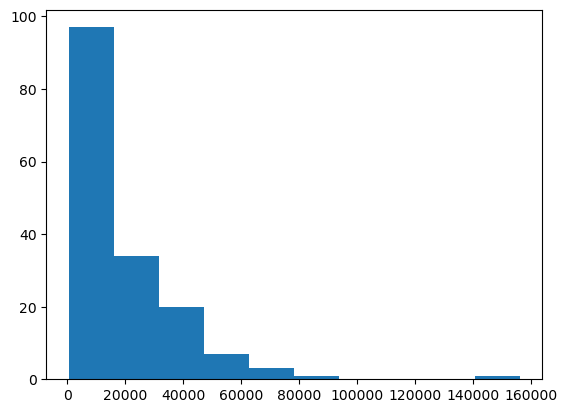

In [85]:
#построим гистограмму, иллюстрирующую распределение ВВП на душу населения в 2015 г. 
plt.hist(data["e_migdppc"])

(array([41., 16., 14., 17.,  9.,  8.,  8., 12.,  3.,  3.,  3.,  6.,  4.,
         4.,  3.,  2.,  2.,  2.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   576.  ,   3685.06,   6794.12,   9903.18,  13012.24,  16121.3 ,
         19230.36,  22339.42,  25448.48,  28557.54,  31666.6 ,  34775.66,
         37884.72,  40993.78,  44102.84,  47211.9 ,  50320.96,  53430.02,
         56539.08,  59648.14,  62757.2 ,  65866.26,  68975.32,  72084.38,
         75193.44,  78302.5 ,  81411.56,  84520.62,  87629.68,  90738.74,
         93847.8 ,  96956.86, 100065.92, 103174.98, 106284.04, 109393.1 ,
        112502.16, 115611.22, 118720.28, 121829.34, 124938.4 , 128047.46,
        131156.52, 134265.58, 137374.64, 140483.7 , 143592.76, 146701.82,
        149810.88, 152919.94, 156029.  ]),
 <BarContainer object of 50 artists>)

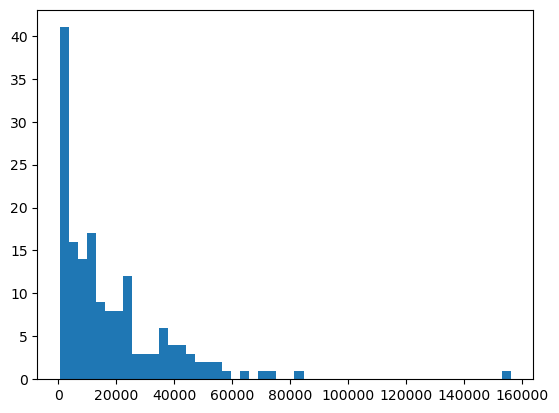

In [86]:
#более гранулярная гистограмма
plt.hist(data["e_migdppc"],bins=50)

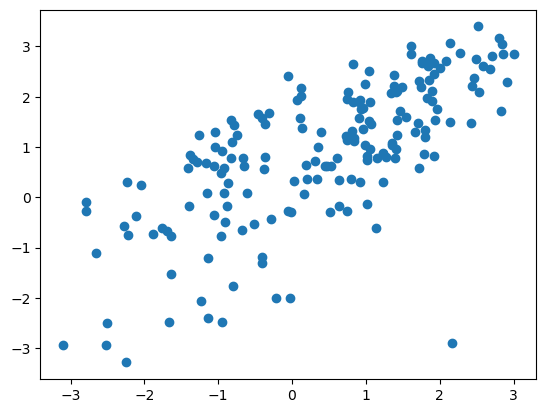

In [88]:
#диаграмма рассеивания - есть ли корреляция между независимостью прессы и независимостью судов? 
plt.scatter(data["v2juhcind"],data["v2mecrit"])

## Задача 2 

1. Загрузите данные выборов в Госдуму за 2021 г. (файл "elections.xlsx"). Мы видим результаты партий по каждой окружной избирательной комиссии. 

2. Вычислите количество ОИКов, где одновременно партии "Единая Россия" и "Новые Люди" набрали не менее 5 \% голосов. 

3. Создайте переменную, фиксирующую разницу в голосах между "Единой Россией" и КПРФ. 

4. Постройте гистограмму предыдущей переменной. 

## Геокодирование 
Python позволяет реализовывать простейшие операции по географическому кодированию.

In [66]:
#получить координаты по конкретному адресу
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myMAil')
location = geolocator.geocode('20 Мясницкая улица Москва')
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

20, Мясницкая улица, Басманный район, Москва, Центральный федеральный округ, 101990, Россия
(55.7614935, 37.633342461196186)
{'place_id': 181578314, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 8644861, 'lat': '55.7614935', 'lon': '37.633342461196186', 'class': 'building', 'type': 'university', 'place_rank': 30, 'importance': 8.908293278396304e-05, 'addresstype': 'building', 'name': '', 'display_name': '20, Мясницкая улица, Басманный район, Москва, Центральный федеральный округ, 101990, Россия', 'boundingbox': ['55.7610992', '55.7618374', '37.6327000', '37.6341428']}


In [67]:
#получить адрес по координатам
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myMAil')
location = geolocator.reverse('55.7614935, 37.633342461196186')
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Шухов Лаб, 20, Мясницкая улица, Басманный район, Москва, Центральный федеральный округ, 101990, Россия
(55.761556, 37.6332889)
{'place_id': 181761935, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 4735613221, 'lat': '55.761556', 'lon': '37.6332889', 'class': 'office', 'type': 'research', 'place_rank': 30, 'importance': 8.908293278396304e-05, 'addresstype': 'office', 'name': 'Шухов Лаб', 'display_name': 'Шухов Лаб, 20, Мясницкая улица, Басманный район, Москва, Центральный федеральный округ, 101990, Россия', 'address': {'office': 'Шухов Лаб', 'house_number': '20', 'road': 'Мясницкая улица', 'suburb': 'Басманный район', 'city': 'Москва', 'state': 'Москва', 'ISO3166-2-lvl4': 'RU-MOW', 'region': 'Центральный федеральный округ', 'postcode': '101990', 'country': 'Россия', 'country_code': 'ru'}, 'boundingbox': ['55.7615060', '55.7616060', '37.6332389', '37.6333389']}


In [68]:
#получить координаты по конкретному адресу
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myMAil')
location = geolocator.geocode('1 Банковский переулок Москва')
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Банковский переулок, Ивановская горка, Басманный район, Москва, Центральный федеральный округ, 101000, Россия
(55.76219515554605, 37.63512412786705)
{'place_id': 181508435, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 8810223, 'lat': '55.76219515554605', 'lon': '37.63512412786705', 'class': 'highway', 'type': 'unclassified', 'place_rank': 26, 'importance': 0.3281092747657318, 'addresstype': 'road', 'name': 'Банковский переулок', 'display_name': 'Банковский переулок, Ивановская горка, Басманный район, Москва, Центральный федеральный округ, 101000, Россия', 'boundingbox': ['55.7619292', '55.7624612', '37.6345899', '37.6356584']}


In [70]:
#получить координаты по конкретному адресу
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myMAil')
location = geolocator.geocode('Большой харитоньевский 1c4 Москва')
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Большой Харитоньевский переулок, Басманный район, Москва, Центральный федеральный округ, 105175, Россия
(55.765996768831506, 37.650297384943286)
{'place_id': 181721913, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 758586232, 'lat': '55.765996768831506', 'lon': '37.650297384943286', 'class': 'highway', 'type': 'residential', 'place_rank': 26, 'importance': 0.3436054023541801, 'addresstype': 'road', 'name': 'Большой Харитоньевский переулок', 'display_name': 'Большой Харитоньевский переулок, Басманный район, Москва, Центральный федеральный округ, 105175, Россия', 'boundingbox': ['55.7654990', '55.7664944', '37.6480103', '37.6525845']}
